# Problem Statement
Using the collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.


# Dataset:
https://archive.ics.uci.edu/ml/datasets/bank+marketing#


#  Import Libraries and load dataset

In [208]:
#Import all the necessary modules
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

num_bins = 10

In [209]:
colnames= ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day','month','duration','campaign','pdays','previous','poutcome','Target']
bank_df = pd.read_csv('bank-full.csv')

#bank_df = pd.read_csv('bank-full.csv',names=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact','day','month','duration','campaign','pdays','previous','poutcome','Target'])
  
#bank_df.drop(bank_df.index[0], inplace=True)   ## Dropped the index 0 label i.e all column names
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [210]:
# only integer columns in complete dataframe
bank_df.describe().transpose()   


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# create data frame df  of string columns using bank_df dataframe


In [211]:

#declare a as empty list
a=[]
a.clear()
for i in  bank_df.columns: 
  if (bank_df[i].dtype!='int64'):
    a.append(i)
# a list populated only with category columns

df = pd.DataFrame(bank_df,columns = a)
df.head(10)

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown,no
8,retired,married,primary,no,yes,no,unknown,may,unknown,no
9,technician,single,secondary,no,yes,no,unknown,may,unknown,no


In [212]:
# Only category columns Dataframe df
#Print the descriptive statistics of string column using describe() function¶
df.describe().transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


# Loop through category cols df  and display their data distribution

In [213]:

for i in  df.columns:
    print ( '-------------------------------------------')
    print('Unique values in' ,i ,'column are-', df[i].nunique())
    print(df[i].isnull().sum() ,'null values in ',i ,'column ')
    print('--Data Distribution in column--')
    #print(df[i].value_counts())
    print(df[i].groupby(df[i]).count())



-------------------------------------------
Unique values in job column are- 12
0 null values in  job column 
--Data Distribution in column--
job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
Name: job, dtype: int64
-------------------------------------------
Unique values in marital column are- 3
0 null values in  marital column 
--Data Distribution in column--
marital
divorced     5207
married     27214
single      12790
Name: marital, dtype: int64
-------------------------------------------
Unique values in education column are- 4
0 null values in  education column 
--Data Distribution in column--
education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
Name: education, dtype: int64
-------------------------------------------
Unique values 

#  Print the datatypes of each column and the shape of the dataset

In [214]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# distribution of 'Target' variable 

In [215]:
df.groupby("Target").agg({'Target': 'count'})

,Target
Target,
no,39922
yes,5289


In [216]:
bank_df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


#  Split the bank_df into training and test set in the ratio of 70:30 (Training:Test).

In [217]:
# Convert category columns  distinct values into Dummy columns

In [218]:

dummy_var1=pd.get_dummies(bank_df['job'],drop_first=True)
dummy_var2=pd.get_dummies(bank_df['marital'],drop_first=True)
dummy_var3=pd.get_dummies(bank_df['education'],drop_first=True)
dummy_var4=pd.get_dummies(bank_df['default'],drop_first=True)
dummy_var5=pd.get_dummies(bank_df['housing'],drop_first=True)
dummy_var6=pd.get_dummies(bank_df['loan'],drop_first=True)
dummy_var7=pd.get_dummies(bank_df['contact'],drop_first=True)
dummy_var8=pd.get_dummies(bank_df['month'],drop_first=True)
dummy_var9=pd.get_dummies(bank_df['poutcome'],drop_first=True)
# merge the above 2 dataframe with the original dataframe df_new
 

df_new2=df_new.drop(['job','marital','education','default','housing','loan','contact','month','poutcome'],axis=1)

#df_new2.to_csv('out.csv') # Store the final Dataframe in csv
df_new2.head(5)
#df_new2.describe().transpose()

,age,balance,day,duration,campaign,pdays,previous,Target,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [219]:
    # splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split
y=df_new2['Target']
X=df_new2.drop('Target',axis=1)

train_set,test_set,train_labels,test_labels=train_test_split(X,y,test_size=.3,random_state=10)

print(bank_df.shape) # Total no of rows and columns
print(test_set.shape) # 30% of test data  out of total samples
print(train_set.shape)# 70% of trained data  out of total samples

#bank_df.info() 
#df.info()

(45211, 17)
(13564, 39)
(31647, 39)


#  Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [221]:
print(dt_model.score(test_set , test_labels)) ## accuracy score
print(dt_model.score(train_set , train_labels))  


test_pred = dt_model.predict(test_set)# model will do the predictions using predict method
#print(test_pred)

from sklearn.metrics import classification_report 
print(classification_report(test_labels,test_pred)) # Accuray score using classification report

from sklearn import metrics
print(metrics.confusion_matrix(test_labels,test_pred))


0.873341197286936
1.0
             precision    recall  f1-score   support

          0       0.93      0.93      0.93     12006
          1       0.45      0.46      0.45      1558

avg / total       0.87      0.87      0.87     13564

[[11136   870]
 [  848   710]]


<b>Result-
Decision tree  model is overfitted.

From confusion matrix<b>

             Actual
             yes     no
                 
predicted ----- yes [  [11136    870]

            no [  848    710]
                              ]
           
           out of ( 11136+848 ) Actual Yes in test sample 11136  has been predicted correctly.

11136+848 / 13564 -- tn+tp/all samples , Accuracy score using confusion matrix is 88%



#  Apply the Random forest model and print the accuracy of Random forest Model

In [222]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(criterion = 'entropy', n_estimators=50)
rfcl = rfcl.fit(train_set, train_labels)
test_pred = rfcl.predict(test_set)
print(rfcl.score(test_set , test_labels)) # accuracy score
print(rfcl.score(train_set , train_labels)) 

# from score ,here also model is Overfitted

0.9069595989383663
0.9999368028565109


#  Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(train_set, train_labels)


In [224]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.9031996461220879

<b/>+++++++++++++++++++++++++++++++++Exploratory data analysis+++++++++++++++++++++++++++++++++</b>


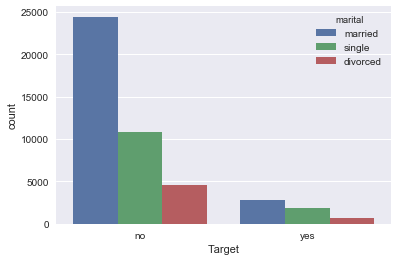

In [225]:
sns.countplot(x='Target',hue='marital' ,data=bank_df)


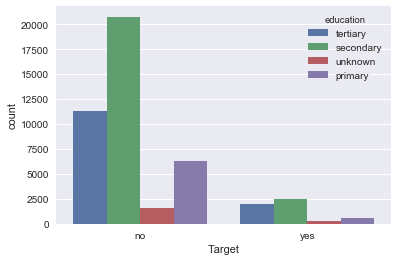

In [226]:
sns.countplot(x='Target',hue='education' ,data=bank_df)


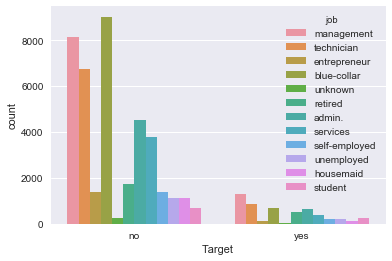

In [227]:
sns.countplot(x='Target',hue='job' ,data=bank_df)


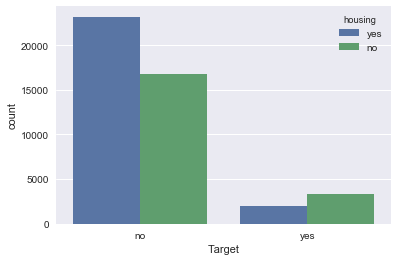

In [228]:
sns.countplot(x='Target',hue='housing' ,data=bank_df)


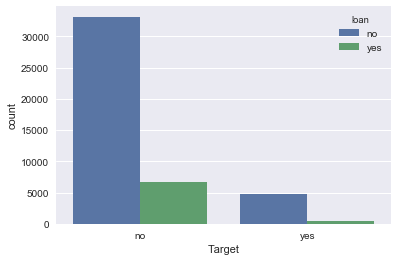

In [229]:
sns.countplot(x='Target',hue='loan' ,data=bank_df)


<b>Graph Conclusion: Target customers would be married person between 30 to 50 years having no loan with management/technician job and education as secondary or teritary who have subscribed the term deposit<b>

​

# from box plot target there are 5000 married  persons who have subscribed term deposit and are between 35 to 55 years

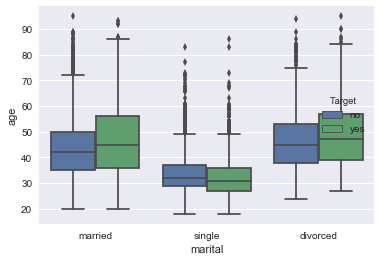

In [242]:

sns.boxplot(x="marital",y="age",data=bank_df,hue="Target")
#sns.boxplot(x=bank_df['age'])
# There are outliers in married and age column


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251EDC293C8>,
      dtype=object)

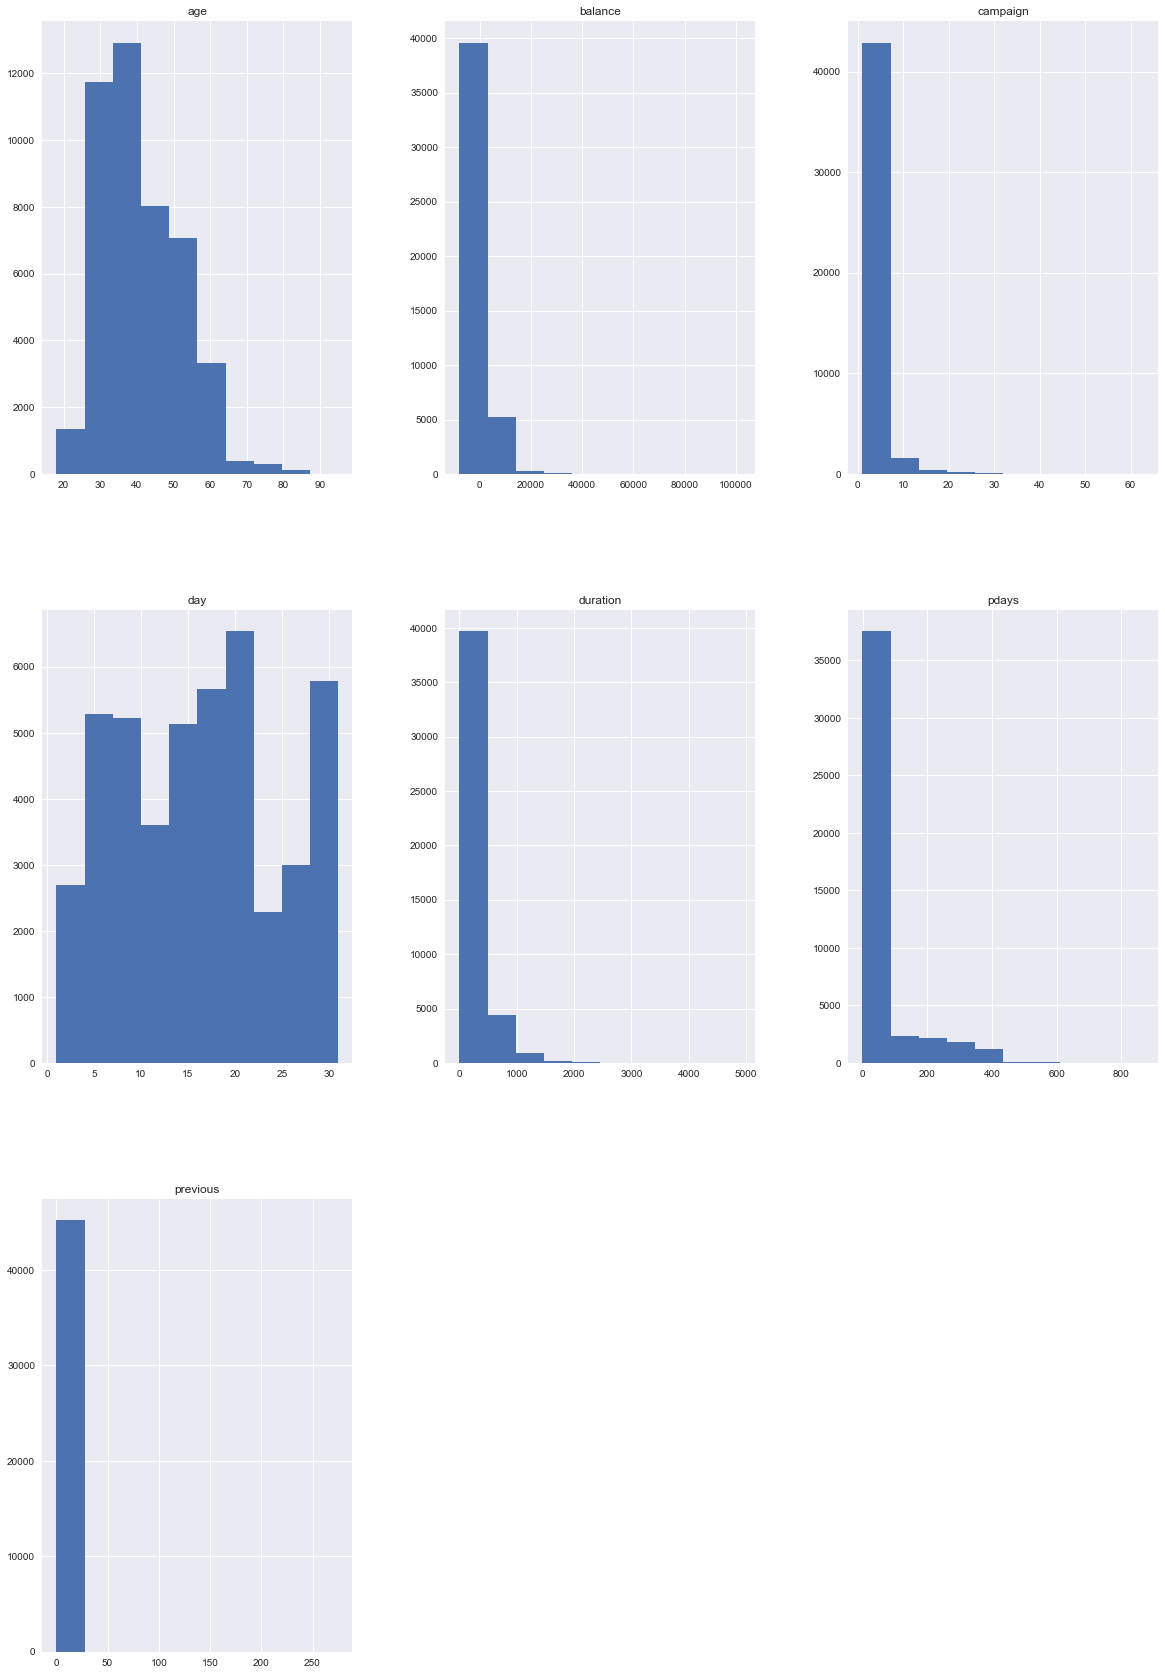

In [231]:
# Data distribution from raw csv file for integer columns
bank_df.hist(figsize=(20,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000251EE19BF28>,
      dtype=object)

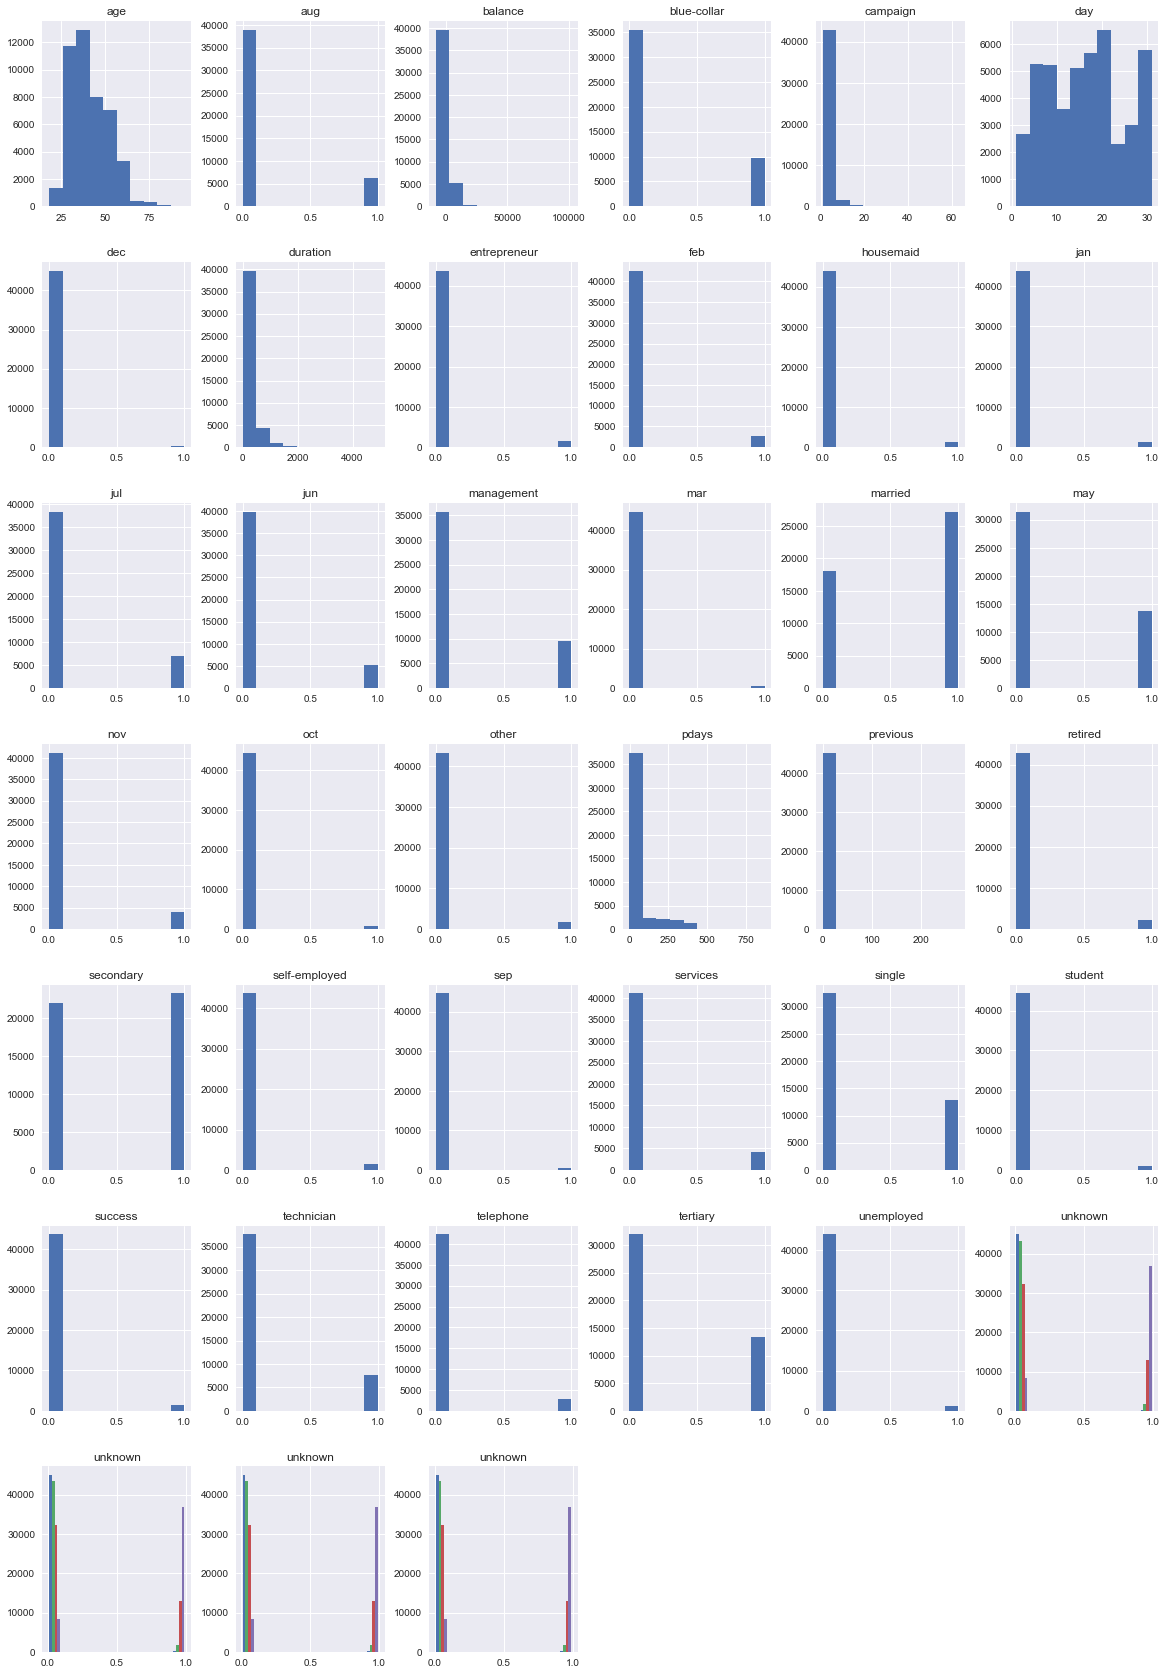

In [232]:
# Data distribution after adding dummy columns for string distinct values
df_new2.hist(figsize=(20,30))

In [233]:
group_by_marital = bank_df.groupby(by=['marital','Target'])
count_by_marital = group_by_marital.count()
count_by_marital 

age    job  education  default  balance  housing   loan  \
marital  Target                                                              
divorced no       4585   4585       4585     4585     4585     4585   4585   
         yes       622    622        622      622      622      622    622   
married  no      24459  24459      24459    24459    24459    24459  24459   
         yes      2755   2755       2755     2755     2755     2755   2755   
single   no      10878  10878      10878    10878    10878    10878  10878   
         yes      1912   1912       1912     1912     1912     1912   1912   

                 contact    day  month  duration  campaign  pdays  previous  \
marital  Target                                                               
divorced no         4585   4585   4585      4585      4585   4585      4585   
         yes         622    622    622       622       622    622       622   
married  no        24459  24459  24459     24459     24459  24459     24459   
         yes        2755   2755   2755      2755      2755   2755      2755   
single   no        10878  10878  10878     10878     10878  10878     10878   
         yes        1912   1912   1912      1912      1912   1912      1912   

                 poutcome  
marital  Target            
divorced no          4585  
         yes          622  
married  no         24459  
         yes         2755  
single   no         10878  
         yes         1912

In [234]:
group_by_marital_job = bank_df.groupby(by=['marital','job','Target'])
count_by_marital_job = group_by_marital_job.count()
count_by_marital_job 

age  education  default  balance  housing  \
marital  job           Target                                               
divorced admin.        no       660        660      660      660      660   
                       yes       90         90       90       90       90   
         blue-collar   no       692        692      692      692      692   
                       yes       58         58       58       58       58   
         entrepreneur  no       164        164      164      164      164   
                       yes       15         15       15       15       15   
         housemaid     no       166        166      166      166      166   
                       yes       18         18       18       18       18   
         management    no       969        969      969      969      969   
                       yes      142        142      142      142      142   
         retired       no       304        304      304      304      304   
                       yes      121        121      121      121      121   
         self-employed no       118        118      118      118      118   
                       yes       22         22       22       22       22   
         services      no       499        499      499      499      499   
                       yes       50         50       50       50       50   
         student       no         5          5        5        5        5   
                       yes        1          1        1        1        1   
         technician    no       848        848      848      848      848   
                       yes       77         77       77       77       77   
         unemployed    no       144        144      144      144      144   
                       yes       27         27       27       27       27   
         unknown       no        16         16       16       16       16   
                       yes        1          1        1        1        1   
married  admin.        no      2387       2387     2387     2387     2387   
                       yes      306        306      306      306      306   
         blue-collar   no      6531       6531     6531     6531     6531   
                       yes      437        437      437      437      437   
         entrepreneur  no       989        989      989      989      989   
                       yes       81         81       81       81       81   
...                             ...        ...      ...      ...      ...   
         technician    no      3636       3636     3636     3636     3636   
                       yes      416        416      416      416      416   
         unemployed    no       634        634      634      634      634   
                       yes       97         97       97       97       97   
         unknown       no       182        182      182      182      182   
                       yes       21         21       21       21       21   
single   admin.        no      1493       1493     1493     1493     1493   
                       yes      235        235      235      235      235   
         blue-collar   no      1801       1801     1801     1801     1801   
                       yes      213        213      213      213      213   
         entrepreneur  no       211        211      211      211      211   
                       yes       27         27       27       27       27   
         housemaid     no       120        120      120      120      120   
                       yes       24         24       24       24       24   
         management    no      2469       2469     2469     2469     2469   
                       yes      478        478      478      478      478   
         retired       no        95         95       95       95       95   
                       yes       13         13       13       13       13   
         self-employed no       360        360      360      360      360   
                       yes  

In [235]:
# married customer with management job have subscribed the term deposit
group_by_job = bank_df.groupby(by=['Target','job'])
count_by_job = group_by_job.count()
count_by_job 



age  marital  education  default  balance  housing  \
Target job                                                                  
no     admin.         4540     4540       4540     4540     4540     4540   
       blue-collar    9024     9024       9024     9024     9024     9024   
       entrepreneur   1364     1364       1364     1364     1364     1364   
       housemaid      1131     1131       1131     1131     1131     1131   
       management     8157     8157       8157     8157     8157     8157   
       retired        1748     1748       1748     1748     1748     1748   
       self-employed  1392     1392       1392     1392     1392     1392   
       services       3785     3785       3785     3785     3785     3785   
       student         669      669        669      669      669      669   
       technician     6757     6757       6757     6757     6757     6757   
       unemployed     1101     1101       1101     1101     1101     1101   
       unknown         254      254        254      254      254      254   
yes    admin.          631      631        631      631      631      631   
       blue-collar     708      708        708      708      708      708   
       entrepreneur    123      123        123      123      123      123   
       housemaid       109      109        109      109      109      109   
       management     1301     1301       1301     1301     1301     1301   
       retired         516      516        516      516      516      516   
       self-employed   187      187        187      187      187      187   
       services        369      369        369      369      369      369   
       student         269      269        269      269      269      269   
       technician      840      840        840      840      840      840   
       unemployed      202      202        202      202      202      202   
       unknown          34       34         34       34       34       34   

                      loan  contact   day  month  duration  campaign  pdays  \
Target job                                                                    
no     admin.         4540     4540  4540   4540      4540      4540   4540   
       blue-collar    9024     9024  9024   9024      9024      9024   9024   
       entrepreneur   1364     1364  1364   1364      1364      1364   1364   
       housemaid      1131     1131  1131   1131      1131      1131   1131   
       management     8157     8157  8157   8157      8157      8157   8157   
       retired        1748     1748  1748   1748      1748      1748   1748   
       self-employed  1392     1392  1392   1392      1392      1392   1392   
       services       3785     3785  3785   3785      3785      3785   3785   
       student         669      669   669    669       669       669    669   
       technician     6757     6757  6757   6757      6757      6757   6757   
       unemployed     1101     1101  1101   1101      1101      1101   1101   
       unknown         254      254   254    254       254       254    254   
yes    admin.          631      631   631    631       631       631    631   
       blue-collar     708      708   708    708       708       708    708   
       entrepreneur    123      123   123    123       123       123    123   
       housemaid       109      109   109    109       109       109    109   
       management     1301     1301  1301   1301      1301      1301   1301   
       retired         516      516   516    516       516       516    516   
       self-employed   187      187   187    187       187       187    187   
       services        369      369   369    369       369       369    369   
       student         269      269   269    269       269       269    269   
       technician      840      840   840    840       840       840    840   
       unemployed      202      202   202    202       202       202    202   
       unknown          34       34    34    

In [236]:
# from this analysis  married person with management job and education as secondary or teritary
#have subscribed the term deposit
group_by_edu = bank_df.groupby(by=['education','Target',])
count_by_edu = group_by_edu.count()
count_by_edu 


age    job  marital  default  balance  housing   loan  \
education Target                                                            
primary   no       6260   6260     6260     6260     6260     6260   6260   
          yes       591    591      591      591      591      591    591   
secondary no      20752  20752    20752    20752    20752    20752  20752   
          yes      2450   2450     2450     2450     2450     2450   2450   
tertiary  no      11305  11305    11305    11305    11305    11305  11305   
          yes      1996   1996     1996     1996     1996     1996   1996   
unknown   no       1605   1605     1605     1605     1605     1605   1605   
          yes       252    252      252      252      252      252    252   

                  contact    day  month  duration  campaign  pdays  previous  \
education Target                                                               
primary   no         6260   6260   6260      6260      6260   6260      6260   
          yes         591    591    591       591       591    591       591   
secondary no        20752  20752  20752     20752     20752  20752     20752   
          yes        2450   2450   2450      2450      2450   2450      2450   
tertiary  no        11305  11305  11305     11305     11305  11305     11305   
          yes        1996   1996   1996      1996      1996   1996      1996   
unknown   no         1605   1605   1605      1605      1605   1605      1605   
          yes         252    252    252       252       252    252       252   

                  poutcome  
education Target            
primary   no          6260  
          yes          591  
secondary no         20752  
          yes         2450  
tertiary  no         11305  
          yes         1996  
unknown   no          1605  
          yes          252

In [237]:
# customers with housing loan have subscribed deposit
group_by_housing = bank_df.groupby(by=['Target','housing'])
count_by_housing = group_by_housing.count()
count_by_housing 


age    job  marital  education  default  balance   loan  \
Target housing                                                              
no     no       16727  16727    16727      16727    16727    16727  16727   
       yes      23195  23195    23195      23195    23195    23195  23195   
yes    no        3354   3354     3354       3354     3354     3354   3354   
       yes       1935   1935     1935       1935     1935     1935   1935   

                contact    day  month  duration  campaign  pdays  previous  \
Target housing                                                               
no     no         16727  16727  16727     16727     16727  16727     16727   
       yes        23195  23195  23195     23195     23195  23195     23195   
yes    no          3354   3354   3354      3354      3354   3354      3354   
       yes         1935   1935   1935      1935      1935   1935      1935   

                poutcome  
Target housing            
no     no          16727  
       yes         23195  
yes    no           3354  
       yes          1935

In [238]:
# Age between 35 to 55 have subscribed
group_by_age = bank_df.groupby(by=['age','Target'])
count_by_age = group_by_age.count()
count_by_age 


job  marital  education  default  balance  housing  loan  \
age Target                                                              
18  no         5        5          5        5        5        5     5   
    yes        7        7          7        7        7        7     7   
19  no        24       24         24       24       24       24    24   
    yes       11       11         11       11       11       11    11   
20  no        35       35         35       35       35       35    35   
    yes       15       15         15       15       15       15    15   
21  no        57       57         57       57       57       57    57   
    yes       22       22         22       22       22       22    22   
22  no        89       89         89       89       89       89    89   
    yes       40       40         40       40       40       40    40   
23  no       158      158        158      158      158      158   158   
    yes       44       44         44       44       44       44    44   
24  no       234      234        234      234      234      234   234   
    yes       68       68         68       68       68       68    68   
25  no       414      414        414      414      414      414   414   
    yes      113      113        113      113      113      113   113   
26  no       671      671        671      671      671      671   671   
    yes      134      134        134      134      134      134   134   
27  no       768      768        768      768      768      768   768   
    yes      141      141        141      141      141      141   141   
28  no       876      876        876      876      876      876   876   
    yes      162      162        162      162      162      162   162   
29  no      1014     1014       1014     1014     1014     1014  1014   
    yes      171      171        171      171      171      171   171   
30  no      1540     1540       1540     1540     1540     1540  1540   
    yes      217      217        217      217      217      217   217   
31  no      1790     1790       1790     1790     1790     1790  1790   
    yes      206      206        206      206      206      206   206   
32  no      1864     1864       1864     1864     1864     1864  1864   
    yes      221      221        221      221      221      221   221   
...          ...      ...        ...      ...      ...      ...   ...   
77  no        22       22         22       22       22       22    22   
    yes       22       22         22       22       22       22    22   
78  no        16       16         16       16       16       16    16   
    yes       14       14         14       14       14       14    14   
79  no        15       15         15       15       15       15    15   
    yes       10       10         10       10       10       10    10   
80  no        19       19         19       19       19       19    19   
    yes       12       12         12       12       12       12    12   
81  no        11       11         11       11       11       11    11   
    yes        6        6          6        6        6        6     6   
82  no        11       11         11       11       11       11    11   
    yes        8        8          8        8        8        8     8   
83  no        16       16         16       16       16       16    16   
    yes        6        6          6        6        6        6     6   
84  no         4        4          4        4        4        4     4   
    yes        5        5          5        5        5        5     5   
85  no         1        1          1        1        1        1     1   
    yes        4        4          4        4        4        4     4   
86  no         5        5          5        5        5        5     5   
    yes        4        4          4        4        4        4     4   
87  no         1        1          1        1        1        1     1   
    yes        3        3          3        3        3        3     3  


<b>Conclusion:
   Target customers would be married person between 30 to 50 years having no loan with management/technician job 
   and education as secondary or teritary who have subscribed the term deposit 